In [1]:
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import nivapy3 as nivapy
import pandas as pd

# Estimate land cover proportions for polygons in Norway using Corine or AR50

The JupyterHub's PostGIS database includes land cover data for Norway based on Corine (2000, 2006, 2012 and 2018) and AR50, both originally downloaded from NIBIO (see the links [here](https://github.com/NIVANorge/niva_jupyter_hub/blob/master/postgis_db/postgis_db_dataset_summary.md) for further details).

This notebook demonstrates how to calculate land use proportions for polygons (supplied as a geodataframe) using any of the Hub's land cover datasets.

## 1. Read example polygons

The user must supply a geodataframe containing the polygons of interest. This could be read e.g. from a shapefile or from GeoJSON, or generated using NivaPy's [catchment delineation functions](https://nbviewer.org/github/NIVANorge/catchment_processing_workflows/blob/main/notebooks/catchment_delineation/04_catchment_delineation.ipynb). Each row of the dataframe should represent one area of interest (use a spatial dissolve operation first if necessary) and there must be a column containing a unique identifier for each polygon.

The example here uses a geodataframe containing catchment boundaries for 21 small catchments in Finnmark.

In [2]:
# Example catchments in Finnmark
shp_path = r"../example_data/catchment_boundaries_2021.shp"
gdf = gpd.read_file(shp_path)
gdf.head()

,vassdragNr,areal_km2,site_name,site_id,geometry
0,234.GEB,9.40,Njahkajavri,1,"POLYGON ((850817.528 7669267.751, 851025.000 7..."
1,234.J3A0,84.26,Caskin-jeaggi / Caskinjohka,4,"POLYGON ((914016.660 7689380.680, 914222.460 7..."
2,234.GDAZ,41.24,Juovvajohka,3,"POLYGON ((870050.000 7694700.000, 870081.269 7..."
3,234.F3BZ,27.38,Gurrojohka,9,"POLYGON ((919269.498 7802100.122, 919364.457 7..."
4,234.GEA0,24.86,Vuomajeaggi,2,"POLYGON ((864315.450 7683072.205, 864387.977 7..."


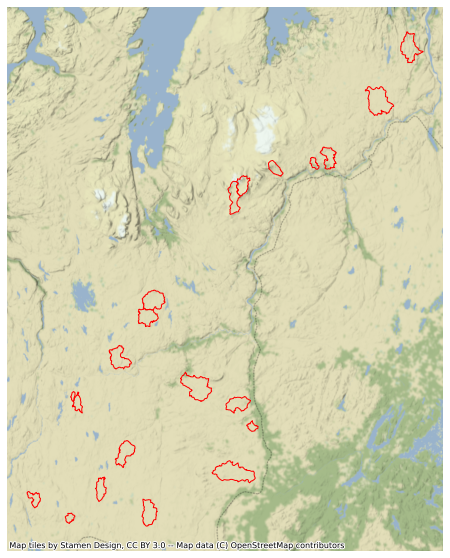

In [3]:
# Plot
ax = gdf.plot(figsize=(10, 10), edgecolor="r", facecolor="none")
cx.add_basemap(ax, crs=gdf.crs, source=cx.providers.Stamen.Terrain)
ax.set_axis_off()

## 2. Get land cover proportions

`nivapy.spatial` includes a function for calculating land cover proportions. See the `docstring` for details. Note especially the `full_extent` parameter, which can have a substantial effect on the processing time in some situations (it doesn't make much difference in the example here, but the effect is more pronounced if you change the land cover dataset to AR50).

In [4]:
nivapy.spatial.get_land_cover_for_polygons?

Signature:
nivapy.spatial.get_land_cover_for_polygons(
    poly_gdf,
    id_col='station_code',
    lc_data='corine_2018',
    full_extent=False,
    reproject=True,
)
Docstring:
Calculate land cover proportions for polygons within in Norway (supplied as a
geodataframe). Available land cover datasets are AR50 or Corine (2000, 2006, 2012
and 2018). All datasets were originally downloaded from NIBIO.

Args:
    poly_gdf:    Polygon geodataframe. Must include a column named 'geometry'
                 containing polygon or multipolygon data types
    id_col:      Str. Name of column in 'poly_gdf' containing a unique ID for each
                 region/(multi)polygon of interest
    lc_data:     Str. Default 'corine_2018'. Land cover dataset to use. Must be one of
                 ['ar50', 'corine_2000', 'corine_2006', 'corine_2012', 'corine_2018'].
                 For further details on each dataset, see the links here:
                 https://github.com/NIVANorge/niva_jupyter_hub/blob/

In [5]:
%%time

# Example using 'full_extent=True'
lc_gdf = nivapy.spatial.get_land_cover_for_polygons(
    gdf, id_col="site_id", lc_data="corine_2018", full_extent=True
)
lc_gdf.head()

Connection successful.
CPU times: user 2.76 s, sys: 71.5 ms, total: 2.83 s
Wall time: 7.17 s


,vassdragNr,areal_km2,site_name,site_id,klasse,kode,norsk,english,site_id_area_km2,class_area_km2,land_cover_pct,geometry
0,234.GEB,9.40,Njahkajavri,1,4.1.2,412.0,Myr,Peat bogs,9.379873,2.703293,28.820141,"MULTIPOLYGON (((849778.680 7665524.992, 849765..."
1,234.GEB,9.40,Njahkajavri,1,3.3.3,333.0,Sparsomt vegetert areal,Sparsely vegetated areas,9.379873,6.676577,71.179828,"MULTIPOLYGON (((850229.190 7665505.112, 850231..."
2,234.AAA0,75.94,Jeakkášjávri,10,3.3.3,333.0,Sparsomt vegetert areal,Sparsely vegetated areas,75.591098,9.031191,11.947427,"MULTIPOLYGON (((975975.341 7827229.349, 975923..."
3,234.AAA0,75.94,Jeakkášjávri,10,3.1.1,311.0,Lauvskog,Broad-leaved forest,75.591098,19.607236,25.938552,"MULTIPOLYGON (((971604.743 7827160.835, 971673..."
4,234.AAA0,75.94,Jeakkášjávri,10,4.1.2,412.0,Myr,Peat bogs,75.591098,40.115389,53.068932,"MULTIPOLYGON (((970768.948 7826354.630, 970739..."


In [6]:
%%time

# Example using 'full_extent=False'
lc_gdf2 = nivapy.spatial.get_land_cover_for_polygons(
    gdf, id_col="site_id", lc_data="corine_2018", full_extent=False
)
lc_gdf2.head()

Connection successful.
CPU times: user 1.1 s, sys: 29.3 ms, total: 1.13 s
Wall time: 8.78 s


,vassdragNr,areal_km2,site_name,site_id,klasse,kode,norsk,english,site_id_area_km2,class_area_km2,land_cover_pct,geometry
0,234.GEB,9.40,Njahkajavri,1,4.1.2,412.0,Myr,Peat bogs,9.379873,2.703293,28.820141,"MULTIPOLYGON (((849778.680 7665524.992, 849765..."
1,234.GEB,9.40,Njahkajavri,1,3.3.3,333.0,Sparsomt vegetert areal,Sparsely vegetated areas,9.379873,6.676577,71.179828,"MULTIPOLYGON (((850229.190 7665505.112, 850231..."
2,234.AAA0,75.94,Jeakkášjávri,10,3.3.3,333.0,Sparsomt vegetert areal,Sparsely vegetated areas,75.591098,9.031191,11.947427,"MULTIPOLYGON (((975975.341 7827229.349, 975923..."
3,234.AAA0,75.94,Jeakkášjávri,10,3.1.1,311.0,Lauvskog,Broad-leaved forest,75.591098,19.607236,25.938552,"MULTIPOLYGON (((971604.743 7827160.835, 971673..."
4,234.AAA0,75.94,Jeakkášjávri,10,4.1.2,412.0,Myr,Peat bogs,75.591098,40.115389,53.068932,"MULTIPOLYGON (((970768.948 7826354.630, 970739..."


,vassdragNr,areal_km2,site_name,site_id,klasse,kode,norsk,english,site_id_area_km2,class_area_km2,land_cover_pct,geometry
29,234.GBC1Z,44.74,Cearrogeasjohka,14,3.2.2,322.0,Hei og lyngmark,Moors and heath land,44.625764,3.984221,8.928073,"MULTIPOLYGON (((866741.568 7733611.391, 866765..."
30,234.GBC1Z,44.74,Cearrogeasjohka,14,3.1.1,311.0,Lauvskog,Broad-leaved forest,44.625764,33.478378,75.020291,"POLYGON ((866454.275 7733579.788, 866473.668 7..."
31,234.GBC1Z,44.74,Cearrogeasjohka,14,4.1.2,412.0,Myr,Peat bogs,44.625764,3.599616,8.066227,"MULTIPOLYGON (((870467.199 7726795.651, 870470..."
32,234.GBC1Z,44.74,Cearrogeasjohka,14,5.1.2,512.0,Innsjø,Water bodies,44.625764,0.269132,0.603086,"POLYGON ((868416.445 7731800.049, 868443.379 7..."
33,234.GBC1Z,44.74,Cearrogeasjohka,14,3.3.3,333.0,Sparsomt vegetert areal,Sparsely vegetated areas,44.625764,3.294438,7.382368,"MULTIPOLYGON (((867980.017 7728024.432, 867960..."


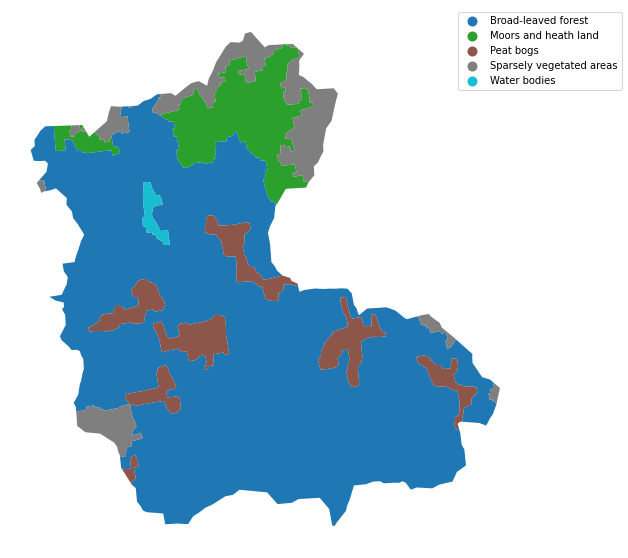

In [7]:
# Results for a single site
site = "14"
site_gdf = lc_gdf.query("site_id == @site")
fig, ax = plt.subplots(figsize=(10, 10))
site_gdf.plot(
    column="english", legend=True, legend_kwds={"bbox_to_anchor": (1.2, 1)}, ax=ax
)
ax.set_axis_off()
site_gdf